<a href="https://colab.research.google.com/github/banhgiaman/Assignment_CoderSchool/blob/master/Copy_of_Assignment_3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
OnlRetail = pd.read_csv("https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv", encoding='latin1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
OnlRetail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
OnlRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
# Your code here
OnlRetail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [6]:
# List all NaN values
OnlRetail[(OnlRetail['Description'].isnull()) | (OnlRetail['CustomerID'].isnull())].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
OnlRetail.drop(labels = OnlRetail[OnlRetail['Quantity'] < 0].index.values, axis = 0, inplace = True)

In [8]:
OnlRetail[OnlRetail['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Exclude negative Price entries**

In [0]:
OnlRetail.drop(labels = OnlRetail[OnlRetail['UnitPrice'] <= 0].index.values, axis = 0, inplace = True)

In [0]:
OnlRetail.drop(labels = OnlRetail[OnlRetail['CustomerID'].isnull()].index.values, axis = 0, inplace = True)

In [11]:
OnlRetail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
OnlRetail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null object
UnitPrice      397884 non-null float64
CustomerID     397884 non-null float64
Country        397884 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [13]:
# Your code here
retail1 = OnlRetail[OnlRetail['Country'] == 'United Kingdom']
OnlRetail['CustomerID'].value_counts().head(1)

17841.0    7847
Name: CustomerID, dtype: int64

**The customer with the highest money spent on purchases comes from Netherlands**

In [0]:
def paid_calculate(row):
  return row['Quantity'] * row['UnitPrice']

In [15]:
# Your code here
retail2 = OnlRetail[OnlRetail['Country'] == 'Netherlands']
retail2['Paid'] = retail2.apply(paid_calculate, axis = 1)
retail2.groupby('Paid').sum().tail(1)

,Quantity,UnitPrice,CustomerID
Paid,,,
4992.0,2400,2.08,14646.0


**On which year had the highest sales?**

In [0]:
import re

In [0]:
# Your code here
def year_set(x):
  tam = x.split()
  if re.search('/10$', tam[0]):
    return 2010
  elif re.search('/11$', tam[0]):
    return 2011

In [18]:
OnlRetail['Year'] = OnlRetail['InvoiceDate'].apply(year_set)
OnlRetail['Paid'] = OnlRetail.apply(paid_calculate, axis = 1)
retail3 = OnlRetail[['Year', 'Paid']].groupby('Year').sum()
retail3[retail3['Paid'] == max(retail3['Paid'])].index.values

array([2011])

**How many orders (per hour)?**

**Make a plot about number of orders per hour**

**How many orders (per month)?**

**Make a plot about number of orders per month**

In [79]:
OnlRetail['Description'] = OnlRetail['Description'].str.strip()
OnlRetail['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

**Top 10 items most sales**

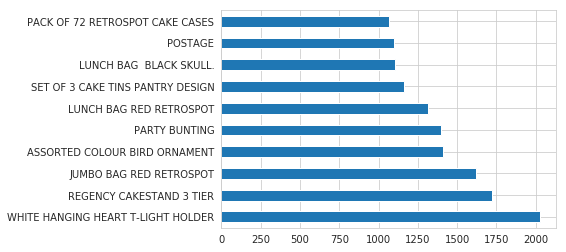

In [112]:
OnlRetail['Description'].value_counts().head(10).plot(kind="barh");

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

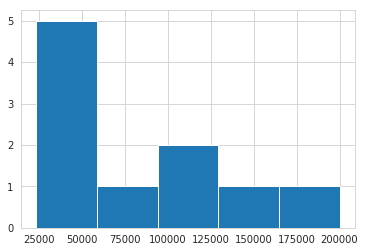

In [115]:
# Your code here
retail4 = OnlRetail[OnlRetail['Country'] != "United Kingdom"]
retail5 = retail4.groupby("Country").sum()
retail5.sort_values(by="Quantity", ascending=False, inplace=True)
retail5 = retail5.head(10)
plt.hist(retail5['Quantity'], bins=5);
# What can you tell about this?
# The highest quantity is around 200000
# The highest rate of quantity in top 10 around 25000-50000

### You are awesome!!